In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
train = pd.read_csv(r'C:\Users\FLUXNATURE\Desktop\ML stuff\train.csv')

In [9]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

"""I will Check through the entire train data for missing values"""

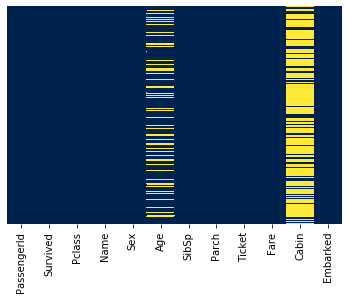

In [12]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

"""I will run some exciting data virtualization to gain better understatnding of the data"""

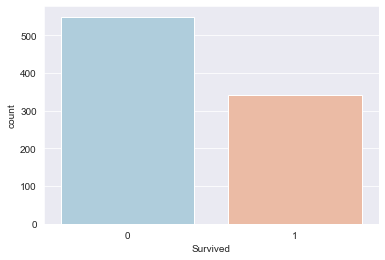

In [13]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

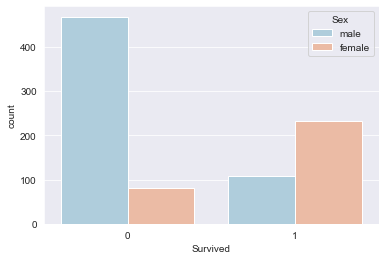

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

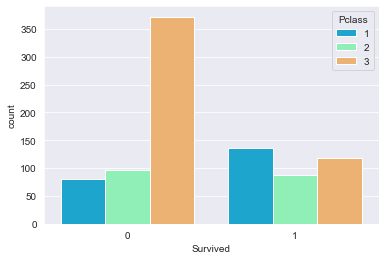

In [15]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

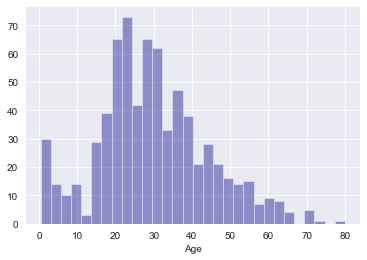

In [16]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkblue',bins=30)

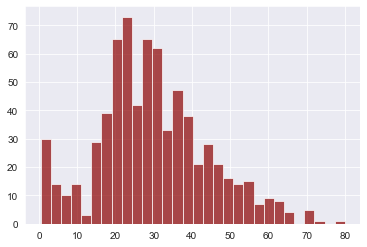

In [17]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

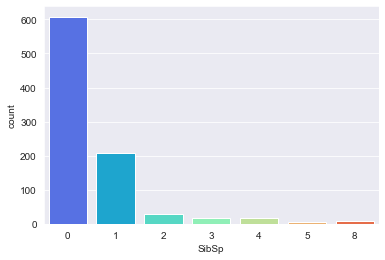

In [18]:
sns.countplot(x='SibSp',data=train, palette = "rainbow")

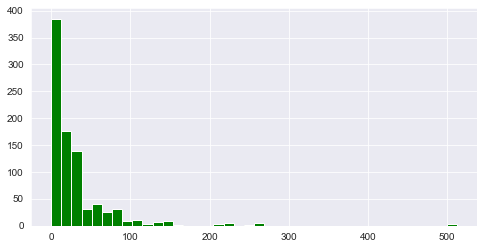

In [19]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [20]:
import cufflinks as cf
cf.go_offline()

In [21]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

"""I believe at this point I can Start working on the missing values.
For the age column we can approximate and fill with mean age"""

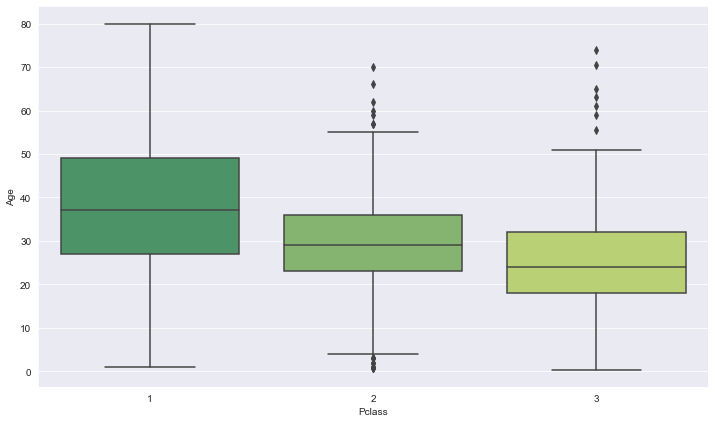

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='summer')

In [26]:
def Inpute_age(self):
    Age = self[0]
    Pclass = self[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [28]:
train['Age'] = train[['Age','Pclass']].apply(Inpute_age,axis=1)

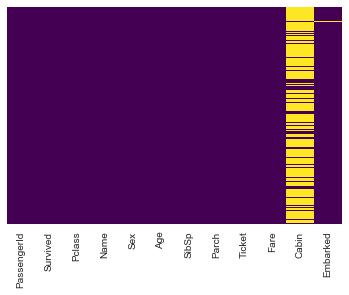

In [29]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

"""The number of missing values from the Cabin column looks quite much. It will be reasonable to drop the Cabin Column"""

In [30]:
train.drop('Cabin',axis=1,inplace=True)

In [31]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

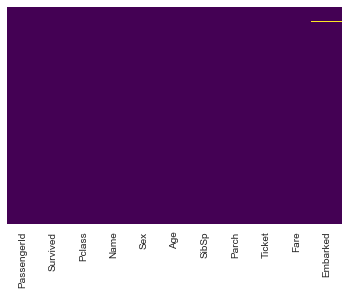

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

"""We have a very Negligible missing values in the Embarked column. Since this is very small we can just drop it"""

In [33]:
train.dropna(inplace=True)

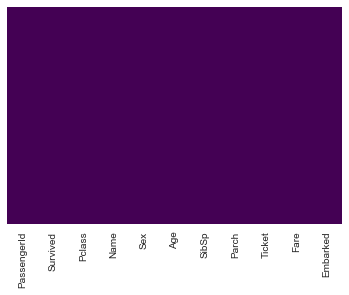

In [34]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

"""I have successfully worked on the missing data completely"""

"""Now I can start woking on the categorical data"""

"""I converted categorical features using pandas to enable machine learning recognise them as features"""

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [36]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [37]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

"""I dropped non-value related data"""

In [38]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [39]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [40]:
train = pd.concat([train,sex,embark],axis=1)

In [41]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1